<a href="https://colab.research.google.com/github/yama-eng/awesome-semantic-segmentation/blob/master/SemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

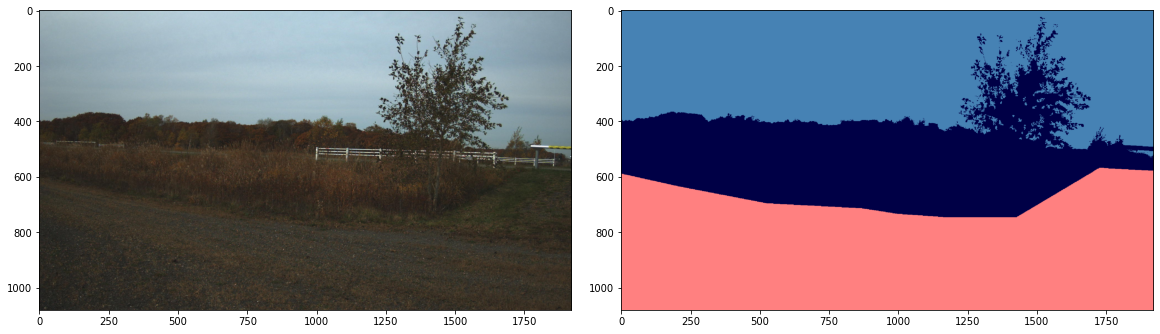

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "drive/MyDrive/train_images_A_0/train_images_A_0/train_image_A0721.png"
label_image_semantic = "drive/MyDrive/train_annotations_A0/train_annotation_A0721.png"

fig, axs = plt.subplots(1,2,figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)


In [ ]:
!pip install keras-segmentation

In [ ]:
kaggle_commit = True

epochs = 20
if kaggle_commit:
    epochs = 1

In [ ]:
from keras_segmentation.models.unet import vgg_unet

n_classes = 19
model = vgg_unet(n_classes=n_classes ,  input_height=416, input_width=608  )

model.train( 
    train_images =  "drive/MyDrive/train_images_A_0/train_images_A_0",
    train_annotations = "drive/MyDrive/train_annotations_A_0",
    verify_dataset=False,
    checkpoints_path = "vgg_unet" , epochs=epochs
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


512/512 [==============================] - 7800s 15s/step - loss: 7.6441e-04 - accuracy: 0.0181
saved  vgg_unet.0


In [ ]:
from keras_segmentation.train import *

find_latest_checkpoint("vgg_unet", fail_safe=True)